In [1]:
import keras
import numpy as np
import tensorflow as tf
gp = tf.test.is_gpu_available() # True/False
print(gp)

print("Hello, keras! ")

Using TensorFlow backend.


True
Hello, keras! 


In [39]:
dim = 2
# dim = 3
# dtype = 0
dtype = 1
# dtype = 2

if dim == 2:
    Nx, Ny, Nz = 100, 100, 1
    indir = '../data-2d/'
if dim == 3:
    Nx, Ny, Nz = 20, 20, 20
    indir = '../data-3d/'
    
infile1 = indir + 'out-t2/m-r'#
infile2 = indir + 'out-t2/k-r'#
infile3 = indir + 'out-t2/E-r'
infileU = indir + 'out-t2/ums4-r'
# infileU = indir + 'out-t2/uf-r'

netname = 'model'+str(dim)+'d-'+str(dtype)+'.net'
errfile = 'err'+str(dim)+'d-'+str(dtype)+'.txt'
lossfile = 'loss'+str(dim)+'d-'+str(dtype)+'.png'
EPOCHS = 500

Nin1 = 0
Nin2 = 1000
print(indir)

../data-2d/


In [31]:
# load data
X_data1 = []
X_data2 = []
X_data3 = []
Y_data1 = []
Y_data2 = []
Y_data3 = []

def extractFobs(xyz, dd):
    Nd = int(len(dd)/dim)
    dd1 = []
    for i in range(Nd):
        dd1.append(dd[dim*i+xyz])
    return dd1

Ntrain = 0
for ri in range(Nin1, Nin2):
    if ri%50 == 0:
        print("load " + str(ri))
    # load 
    my_dataX1 = np.loadtxt(infile1 + str(ri) + '.txt', dtype=float)
#     my_dataX2 = np.loadtxt(infile2 + str(ri) + '.txt', dtype=float)
#     my_dataX3 = np.loadtxt(infile3 + str(ri) + '.txt', dtype=float)
    my_dataY  = np.loadtxt(infileU + str(ri) + '.txt', dtype=float)
    X_data1.append(my_dataX1.flatten())
#     X_data2.append(my_dataX2.flatten())
#     X_data3.append(my_dataX3.flatten())
    Y_data1.append(extractFobs(0, my_dataY))
    Y_data2.append(extractFobs(1, my_dataY))
    if dim == 3:
        Y_data3.append(extractFobs(2, my_dataY))
    Ntrain += 1  
print("Number for train " + str(Ntrain) ) 

load 0
load 50
load 100
load 150
load 200
load 250
load 300
load 350
load 400
load 450
load 500
load 550
load 600
load 650
load 700
load 750
load 800
load 850
load 900
load 950
Number for train 1000


In [40]:
# normalize
XX1 = np.array(X_data1, dtype="float")
# XX2 = np.array(X_data2, dtype="float")
# XX3 = np.array(X_data3, dtype="float")
if dtype == 0:
    YY1 = np.array(Y_data1, dtype="float")
if dtype ==1:
    YY1 = np.array(Y_data2, dtype="float")
if dtype == 2:
    YY1 = np.array(Y_data3, dtype="float")
print(YY1.shape)


xmin1, xmax1 = np.min(XX1), np.max(XX1)
# xmin2, xmax2 = np.min(XX2), np.max(XX2)
# xmin3, xmax3 = np.min(XX3), np.max(XX3)
print('X1:', xmin1, xmax1)
# print('X2:', xmin2, xmax2)
# print('X3:', xmin3, xmax3)
print("[INFO] normalize X...")
XX1 = (XX1 - xmin1) / (xmax1 - xmin1)
# XX2 = (XX2 - xmin2) / (xmax2 - xmin2)
# XX3 = (XX3 - xmin3) / (xmax3 - xmin3)

vmin1, vmax1 = np.min(YY1), np.max(YY1)
print('Y:', vmin1, vmax1)
print("[INFO] normalize Y...")
YY1 = (YY1 -  vmin1)/(vmax1 - vmin1)
    
print("[INFO] divide into test and train...")    
# (X_train1, X_train2, X_train3, Y_train) = (XX1, XX2, XX3, YY1)
(X_train1, Y_train) = (XX1, YY1)

print("[INFO] reshape...")
if dim == 2:
    X_train1 = X_train1.reshape(X_train1.shape[0], Nx, Ny, 1)
#     X_train2 = X_train2.reshape(X_train2.shape[0], Nx, Ny, 1)
#     X_train3 = X_train3.reshape(X_train3.shape[0], Nx, Ny, 1)
if dim == 3:
    X_train1 = X_train1.reshape(X_train1.shape[0], Nx, Ny, Nz, 1)
#     X_train2 = X_train2.reshape(X_train2.shape[0], Nx, Ny, Nz, 1)
#     X_train3 = X_train3.reshape(X_train3.shape[0], Nx, Ny, Nz, 1)
print(X_train1.shape)#, X_train2.shape, X_train3.shape)
print(Y_train.shape)

Ntrain = Y_train.shape[0]
Nclass = Y_train.shape[1]
print("Number for train " + str(Ntrain) ) 
print("Number for classes " + str(Nclass) ) 

(1000, 101)
('X1:', 0.050000000000000003, 0.20000000000000001)
[INFO] normalize X...
('Y:', -0.047792099999999997, -0.0088949000000000007)
[INFO] normalize Y...
[INFO] divide into test and train...
[INFO] reshape...
(1000, 100, 100, 1)
(1000, 101)
Number for train 1000
Number for classes 101


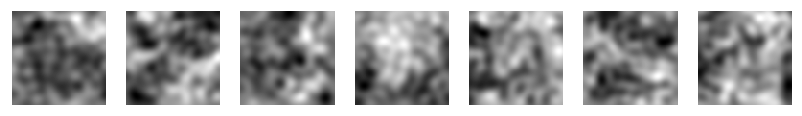

In [41]:
# plot 2D
n = 7
import matplotlib.pyplot as plt
plt.figure(figsize=(n*2, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    if dim == 2:
        plt.imshow(X_train1[i].reshape(Nx, Ny))
    if dim == 3:
        plt.imshow(X_train1[i].reshape(Nx, Ny, Nz)[:,:,1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, Input, concatenate
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras import backend as K
import time

print("[INFO] compiling model...")
batch_size = Ntrain#Ncells#Ntrain


def create_cnn(NN, depth):
    activfunc = 'relu'
    drop = 0.1
    nlayers1 = [8, 16]#, 32, 64]#, 128]
#     nlayers2 = [Nclass*4, Nclass*2]
    if dim == 2:
        input_shape = (NN, NN, depth)
        if K.image_dim_ordering() == 'th':
            input_shape = (depth, Nx, Ny)
    if dim == 3:
        input_shape = (NN, NN, NN, depth)
        if K.image_dim_ordering() == 'th':
            input_shape = (depth, Nx, Ny, Nz)
        print(input_shape)
    # define input
    inputs = Input(shape=input_shape)
    # convolutions
    for i, li in enumerate(nlayers1):
        if(i == 0):
            x = inputs
        if dim == 2:
            x = Conv2D(li, (3, 3), padding='same')(x)
        if dim == 3:    
            x = Conv3D(li, (3, 3, 3), padding='same')(x)
        x = Activation(activfunc)(x)
        if dim == 2:
            x = MaxPooling2D(pool_size=(2, 2))(x) 
        if dim == 3:
            x = MaxPooling3D(pool_size=(2, 2, 2))(x)
        print("Added Layer CONV " + str(li))
    # fully connected
    x = Flatten()(x)
    x = Activation(activfunc)(x)
    x = Dropout(drop)(x)
#     for li in nlayers2:
#         x = Dense(li)(x)
#         x = Activation(activfunc)(x)
#         x = Dropout(drop)(x)
#         print("Added Layer FC " + str(li))
    # model
    model = Model(inputs, x)
    return model

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))/K.sqrt(K.mean(K.square(y_true), axis=-1))*100 
def mae2(y_true, y_pred):
    return K.sum(K.abs(y_pred - y_true), axis=-1)/K.sum(K.abs(y_true), axis=-1)*100 
    
ts = time.time()

# model1 = create_cnn(NN=Nx, depth=1)
# model2 = create_cnn(NN=Nx, depth=1)
# model3 = create_cnn(NN=Nx, depth=1)
# inmodelsout = [model1.output, model2.output]
# inmodelsin = [model1.input, model2.input]
# inp = [X_train1, X_train2]
# combinedInput = concatenate(inmodelsout)

model1 = create_cnn(NN=Nx, depth=1)
inmodelsout = model1.output
inmodelsin = model1.input
inp = X_train1
combinedInput = inmodelsout

# fc
activfunc = 'relu'
# nlayers = [Nclass*4, Nclass*2]
# x = Dense(nlayers[0], activation=activfunc)(combinedInput)
# x = Dense(nlayers[1], activation=activfunc)(x)
# x = Dense(Nclass, activation=activfunc)(x)
x = Dense(Nclass, activation=activfunc)(combinedInput)
# model
model = Model(inputs=inmodelsin, outputs=x)
model.compile(loss='mse', optimizer='adam', metrics=[rmse, mae2])
plot_model(model, to_file='model-plot.png', show_shapes=True, show_layer_names=True)
# model.summary()
# train
H = model.fit(inp, Y_train, batch_size=batch_size, epochs=EPOCHS, verbose=1, validation_split=0.2)
print(time.time()-ts)

# save 
ts = time.time()
print("[INFO] save network...")
model.save(netname)

# model.summary()
print(time.time()-ts)

[INFO] compiling model...
Added Layer CONV 8
Added Layer CONV 16
Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 0s - loss: 0.2627 - rmse: 88.3156 - mae2: 86.0292 - val_loss: 0.0793 - val_rmse: 52.2817 - val_mae2: 42.7276
Epoch 2/500
800/800 [==============================] - 0s - loss: 0.0801 - rmse: 54.3747 - mae2: 44.7798 - val_loss: 0.1566 - val_rmse: 77.5090 - val_mae2: 72.5881
Epoch 3/500
800/800 [==============================] - 0s - loss: 0.1709 - rmse: 82.3181 - mae2: 77.9357 - val_loss: 0.0817 - val_rmse: 55.6734 - val_mae2: 47.7008
Epoch 4/500
800/800 [==============================] - 0s - loss: 0.0871 - rmse: 58.6609 - mae2: 50.9813 - val_loss: 0.0736 - val_rmse: 46.2035 - val_mae2: 37.6760
Epoch 5/500
800/800 [==============================] - 0s - loss: 0.0696 - rmse: 47.1851 - mae2: 38.3573 - val_loss: 0.1108 - val_rmse: 53.1972 - val_mae2: 47.5918
Epoch 6/500
800/800 [==============================] - 0s - loss: 0.1

800/800 [==============================] - 0s - loss: 0.0246 - rmse: 28.2568 - mae2: 15.9758 - val_loss: 0.0240 - val_rmse: 27.1272 - val_mae2: 13.8994
Epoch 51/500
800/800 [==============================] - 0s - loss: 0.0245 - rmse: 28.2176 - mae2: 15.8900 - val_loss: 0.0240 - val_rmse: 27.1391 - val_mae2: 13.9527
Epoch 52/500
800/800 [==============================] - 0s - loss: 0.0245 - rmse: 28.2119 - mae2: 15.8731 - val_loss: 0.0239 - val_rmse: 27.0635 - val_mae2: 13.8375
Epoch 53/500
800/800 [==============================] - 0s - loss: 0.0244 - rmse: 28.1124 - mae2: 15.7197 - val_loss: 0.0238 - val_rmse: 26.8866 - val_mae2: 13.4632
Epoch 54/500
800/800 [==============================] - 0s - loss: 0.0242 - rmse: 27.8873 - mae2: 15.3603 - val_loss: 0.0237 - val_rmse: 26.8081 - val_mae2: 13.3264
Epoch 55/500
800/800 [==============================] - 0s - loss: 0.0241 - rmse: 27.8121 - mae2: 15.2752 - val_loss: 0.0236 - val_rmse: 26.7319 - val_mae2: 13.3469
Epoch 56/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0169 - rmse: 23.2409 - mae2: 11.8198 - val_loss: 0.0165 - val_rmse: 22.4484 - val_mae2: 10.5181
Epoch 100/500
800/800 [==============================] - 0s - loss: 0.0167 - rmse: 23.1690 - mae2: 11.7176 - val_loss: 0.0164 - val_rmse: 22.4043 - val_mae2: 10.4390
Epoch 101/500
800/800 [==============================] - 0s - loss: 0.0166 - rmse: 23.1320 - mae2: 11.6921 - val_loss: 0.0164 - val_rmse: 22.4212 - val_mae2: 10.3841
Epoch 102/500
800/800 [==============================] - 0s - loss: 0.0167 - rmse: 23.1597 - mae2: 11.6594 - val_loss: 0.0165 - val_rmse: 22.5041 - val_mae2: 10.4970
Epoch 103/500
800/800 [==============================] - 0s - loss: 0.0167 - rmse: 23.2018 - mae2: 11.6438 - val_loss: 0.0165 - val_rmse: 22.5032 - val_mae2: 10.5284
Epoch 104/500
800/800 [==============================] - 0s - loss: 0.0166 - rmse: 23.1646 - mae2: 11.6214 - val_loss: 0.0164 - val_rmse: 22.3768 - val_mae2: 10.3478
Epoch 105/500
800/

800/800 [==============================] - 0s - loss: 0.0159 - rmse: 22.4344 - mae2: 10.4370 - val_loss: 0.0166 - val_rmse: 22.5071 - val_mae2: 10.8598
Epoch 149/500
800/800 [==============================] - 0s - loss: 0.0158 - rmse: 22.4195 - mae2: 10.3419 - val_loss: 0.0166 - val_rmse: 22.4843 - val_mae2: 10.8224
Epoch 150/500
800/800 [==============================] - 0s - loss: 0.0158 - rmse: 22.3727 - mae2: 10.2918 - val_loss: 0.0166 - val_rmse: 22.4680 - val_mae2: 10.8009
Epoch 151/500
800/800 [==============================] - 0s - loss: 0.0159 - rmse: 22.4240 - mae2: 10.3774 - val_loss: 0.0166 - val_rmse: 22.4721 - val_mae2: 10.8132
Epoch 152/500
800/800 [==============================] - 0s - loss: 0.0159 - rmse: 22.4054 - mae2: 10.3287 - val_loss: 0.0166 - val_rmse: 22.5299 - val_mae2: 10.9130
Epoch 153/500
800/800 [==============================] - 0s - loss: 0.0158 - rmse: 22.4085 - mae2: 10.3488 - val_loss: 0.0166 - val_rmse: 22.4784 - val_mae2: 10.8309
Epoch 154/500
800/

800/800 [==============================] - 0s - loss: 0.0121 - rmse: 19.6541 - mae2: 8.7476 - val_loss: 0.0132 - val_rmse: 20.2008 - val_mae2: 10.2284
Epoch 198/500
800/800 [==============================] - 0s - loss: 0.0122 - rmse: 19.6556 - mae2: 8.7759 - val_loss: 0.0133 - val_rmse: 20.2481 - val_mae2: 10.2909
Epoch 199/500
800/800 [==============================] - 0s - loss: 0.0122 - rmse: 19.6673 - mae2: 8.7487 - val_loss: 0.0133 - val_rmse: 20.3354 - val_mae2: 10.4281
Epoch 200/500
800/800 [==============================] - 0s - loss: 0.0122 - rmse: 19.7134 - mae2: 8.8337 - val_loss: 0.0133 - val_rmse: 20.2272 - val_mae2: 10.2699
Epoch 201/500
800/800 [==============================] - 0s - loss: 0.0122 - rmse: 19.6715 - mae2: 8.7632 - val_loss: 0.0132 - val_rmse: 20.1916 - val_mae2: 10.2223
Epoch 202/500
800/800 [==============================] - 0s - loss: 0.0121 - rmse: 19.6065 - mae2: 8.6317 - val_loss: 0.0133 - val_rmse: 20.3040 - val_mae2: 10.4013
Epoch 203/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.3808 - mae2: 8.1818 - val_loss: 0.0134 - val_rmse: 20.3811 - val_mae2: 10.5822
Epoch 247/500
800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.4090 - mae2: 8.2272 - val_loss: 0.0134 - val_rmse: 20.3308 - val_mae2: 10.5090
Epoch 248/500
800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.4096 - mae2: 8.2625 - val_loss: 0.0134 - val_rmse: 20.3731 - val_mae2: 10.5769
Epoch 249/500
800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.4261 - mae2: 8.2483 - val_loss: 0.0134 - val_rmse: 20.3870 - val_mae2: 10.6010
Epoch 250/500
800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.4005 - mae2: 8.2171 - val_loss: 0.0134 - val_rmse: 20.3632 - val_mae2: 10.5659
Epoch 251/500
800/800 [==============================] - 0s - loss: 0.0119 - rmse: 19.3547 - mae2: 8.1377 - val_loss: 0.0134 - val_rmse: 20.4033 - val_mae2: 10.6253
Epoch 252/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0085 - rmse: 16.4999 - mae2: 7.0874 - val_loss: 0.0101 - val_rmse: 17.8497 - val_mae2: 9.9114
Epoch 296/500
800/800 [==============================] - 0s - loss: 0.0084 - rmse: 16.3752 - mae2: 6.8679 - val_loss: 0.0101 - val_rmse: 17.7514 - val_mae2: 9.7781
Epoch 297/500
800/800 [==============================] - 0s - loss: 0.0084 - rmse: 16.3513 - mae2: 6.8926 - val_loss: 0.0102 - val_rmse: 17.9520 - val_mae2: 10.0776
Epoch 298/500
800/800 [==============================] - 0s - loss: 0.0084 - rmse: 16.4126 - mae2: 6.9970 - val_loss: 0.0101 - val_rmse: 17.8567 - val_mae2: 9.9396
Epoch 299/500
800/800 [==============================] - 0s - loss: 0.0084 - rmse: 16.3136 - mae2: 6.7689 - val_loss: 0.0101 - val_rmse: 17.7633 - val_mae2: 9.7968
Epoch 300/500
800/800 [==============================] - 0s - loss: 0.0084 - rmse: 16.3407 - mae2: 6.8182 - val_loss: 0.0102 - val_rmse: 17.9348 - val_mae2: 10.0647
Epoch 301/500
800/800 [=====

800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.2059 - mae2: 6.5984 - val_loss: 0.0102 - val_rmse: 17.8994 - val_mae2: 10.0248
Epoch 345/500
800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.1679 - mae2: 6.4865 - val_loss: 0.0103 - val_rmse: 18.1351 - val_mae2: 10.3983
Epoch 346/500
800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.2572 - mae2: 6.6640 - val_loss: 0.0102 - val_rmse: 17.9070 - val_mae2: 10.0389
Epoch 347/500
800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.1675 - mae2: 6.4925 - val_loss: 0.0102 - val_rmse: 17.8898 - val_mae2: 10.0123
Epoch 348/500
800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.1612 - mae2: 6.4697 - val_loss: 0.0103 - val_rmse: 18.0794 - val_mae2: 10.3124
Epoch 349/500
800/800 [==============================] - 0s - loss: 0.0083 - rmse: 16.2293 - mae2: 6.6284 - val_loss: 0.0103 - val_rmse: 18.0031 - val_mae2: 10.1949
Epoch 350/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0081 - rmse: 16.0665 - mae2: 6.2293 - val_loss: 0.0104 - val_rmse: 18.0923 - val_mae2: 10.3318
Epoch 394/500
800/800 [==============================] - 0s - loss: 0.0082 - rmse: 16.0796 - mae2: 6.2752 - val_loss: 0.0103 - val_rmse: 17.9857 - val_mae2: 10.1584
Epoch 395/500
800/800 [==============================] - 0s - loss: 0.0082 - rmse: 16.0602 - mae2: 6.2491 - val_loss: 0.0103 - val_rmse: 18.0176 - val_mae2: 10.2115
Epoch 396/500
800/800 [==============================] - 0s - loss: 0.0082 - rmse: 16.0782 - mae2: 6.2768 - val_loss: 0.0103 - val_rmse: 18.0617 - val_mae2: 10.2836
Epoch 397/500
800/800 [==============================] - 0s - loss: 0.0082 - rmse: 16.1062 - mae2: 6.3253 - val_loss: 0.0103 - val_rmse: 18.0087 - val_mae2: 10.1988
Epoch 398/500
800/800 [==============================] - 0s - loss: 0.0082 - rmse: 16.0750 - mae2: 6.2581 - val_loss: 0.0103 - val_rmse: 18.0090 - val_mae2: 10.1996
Epoch 399/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0081 - rmse: 15.9933 - mae2: 6.0953 - val_loss: 0.0104 - val_rmse: 18.1515 - val_mae2: 10.4479
Epoch 443/500
800/800 [==============================] - 0s - loss: 0.0081 - rmse: 16.0011 - mae2: 6.0981 - val_loss: 0.0104 - val_rmse: 18.1009 - val_mae2: 10.3612
Epoch 444/500
800/800 [==============================] - 0s - loss: 0.0081 - rmse: 16.0110 - mae2: 6.1139 - val_loss: 0.0104 - val_rmse: 18.0942 - val_mae2: 10.3462
Epoch 445/500
800/800 [==============================] - 0s - loss: 0.0081 - rmse: 15.9564 - mae2: 5.9835 - val_loss: 0.0104 - val_rmse: 18.1092 - val_mae2: 10.3711
Epoch 446/500
800/800 [==============================] - 0s - loss: 0.0081 - rmse: 15.9696 - mae2: 6.0281 - val_loss: 0.0104 - val_rmse: 18.1707 - val_mae2: 10.4729
Epoch 447/500
800/800 [==============================] - 0s - loss: 0.0081 - rmse: 16.0022 - mae2: 6.0857 - val_loss: 0.0095 - val_rmse: 17.2981 - val_mae2: 10.1738
Epoch 448/500
800/800 [=

800/800 [==============================] - 0s - loss: 0.0041 - rmse: 11.4454 - mae2: 4.8865 - val_loss: 0.0064 - val_rmse: 14.2676 - val_mae2: 9.3500
Epoch 493/500
800/800 [==============================] - 0s - loss: 0.0042 - rmse: 11.4703 - mae2: 4.9373 - val_loss: 0.0066 - val_rmse: 14.5766 - val_mae2: 9.7648
Epoch 494/500
800/800 [==============================] - 0s - loss: 0.0042 - rmse: 11.6552 - mae2: 5.2670 - val_loss: 0.0064 - val_rmse: 14.2300 - val_mae2: 9.3020
Epoch 495/500
800/800 [==============================] - 0s - loss: 0.0041 - rmse: 11.4489 - mae2: 4.8819 - val_loss: 0.0064 - val_rmse: 14.2342 - val_mae2: 9.3101
Epoch 496/500
800/800 [==============================] - 0s - loss: 0.0042 - rmse: 11.4862 - mae2: 4.9468 - val_loss: 0.0066 - val_rmse: 14.5635 - val_mae2: 9.7474
Epoch 497/500
800/800 [==============================] - 0s - loss: 0.0042 - rmse: 11.5749 - mae2: 5.1058 - val_loss: 0.0064 - val_rmse: 14.2519 - val_mae2: 9.3366
Epoch 498/500
800/800 [=======

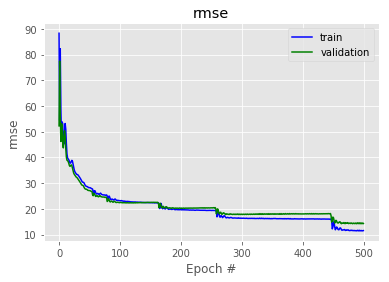

loss saved


In [43]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = EPOCHS

plt.plot(np.arange(0, N), H.history["loss"], label="train", c='blue')
plt.plot(np.arange(0, N), H.history["val_loss"], label="validation", c='green')
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.savefig(lossfile)
# plt.show()
plt.close('all')

plt.plot(np.arange(0, N), H.history["rmse"], label="train", c='blue')
plt.plot(np.arange(0, N), H.history["val_rmse"], label="validation", c='green')
plt.title("rmse")
plt.xlabel("Epoch #")
plt.ylabel("rmse")
plt.legend(loc="upper right")
# plt.savefig('rmse.png')
plt.show()
plt.close('all')

print("loss saved")

In [44]:
# predict
train_pred = model.predict(inp)
print('predicted')

predicted


In [45]:
# ERRORS
nobs = 0
Fobs = np.zeros(Nclass)
sumut = 0.0
for j in range(Nclass):
    Fobs[j] = Y_train[nobs, j]
    sumut  += Fobs[j]**2
# sumut = 1.0

with open(errfile,"w")as fp:
    line = 'ERRORS \n'
    errs1 = np.zeros(Ntrain)
    errs2 = np.zeros(Ntrain)
    errs3 = np.zeros(Ntrain)
    Fnorms1 = np.zeros(Ntrain)
    Fnorms2 = np.zeros(Ntrain)
    for i in range(Ntrain):
        ferr = 0; fsum = 0
        aerr = 0; asum = 0
        errut1 = 0.0;  errut2 = 0.0
        for j in range(Nclass):
            ferr += (Y_train[i, j] - train_pred[i, j])**2
            fsum += (Y_train[i, j])**2
            aerr += abs(Y_train[i, j] - train_pred[i, j])
            asum += abs(Y_train[i, j])
            # obs
            errut1 += (Y_train[i, j] - Fobs[j])**2
            errut2 += (train_pred[i, j] - Fobs[j])**2
        Fnorms1[i] = errut1/sumut
        Fnorms2[i] = errut2/sumut
        if i == 25:
            print(Fnorms1[i], Fnorms2[i])
        
        errs1[i] = ferr/fsum
        errs2[i] = np.sqrt(ferr/fsum)
        errs3[i] = aerr/asum
#     print(errs2)
    line += 'MSE error:' + str(errs1.mean()) + '\n'
    line += 'RMSE error:' + str(100*errs2.mean()) + '\n'
    line += 'MAE error:' + str(100*errs3.mean()) + '\n'
    line += '\n'
    
    line += 'xmin1 = '+str(xmin1)+'; xmax1 = '+str(xmax1)+' \n'
#     line += 'xmin2 = '+str(xmin2)+'; xmax2 = '+str(xmax2)+' \n'
#     line += 'xmin3 = '+str(xmin3)+'; xmax3 = '+str(xmax3)+' \n'
    line += 'vmin1  = '+str(vmin1)+';  vmax  = '+str(vmax1)+' \n'
#     line += 'vmin1  = '+str(vmin1)+';  vmax  = '+str(vmax1)+' \n'
   
    # save
    print(line)
    fp.write(line + '\n')

(0.052616152506400247, 0.055389077871444772)
ERRORS 
MSE error:0.0142110056754
RMSE error:11.5698155392
MAE error:4.71566406007

xmin1 = 0.05; xmax1 = 0.2 
vmin1  = -0.0477921;  vmax  = -0.0088949 



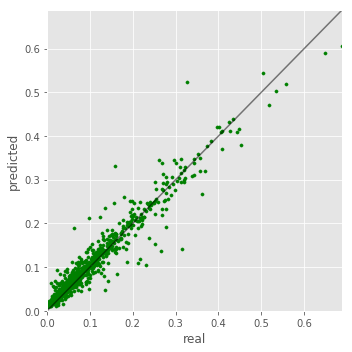

saved


In [46]:
# plot
fmin, fmax = np.min(Fnorms1), np.max(Fnorms1)

fig = plt.figure(figsize=(5*1,5))
ax1=fig.add_subplot(1,1,1)
ax1.plot([fmin, fmax], [fmin, fmax], c='black', alpha=0.5)
ax1.scatter(Fnorms1, Fnorms2, s=10, c='green')
plt.xlabel("real")
plt.ylabel("predicted")
plt.xlim([fmin, fmax])
plt.ylim([fmin, fmax])
plt.legend()
plt.tight_layout()
# plt.savefig('crp.png',dpi=200)
plt.show()
print("saved")